## **Rede SOM (Self-Organizing Map)**

**Aluno:** Pedro Victor Andrade Alves

**Matrícula:** 20190001079

O objetivo deste projeto é treinar um modelo não-supervisionado para visualizar o desempenho de estudantes, de diferentes países, em uma olimpíada de matemática. 

**Fonte:** [https://www.kaggle.com/luckyt/imo-scores](https://www.kaggle.com/luckyt/imo-scores)

## Carregando os Dados 

In [21]:
import pandas as pd
import numpy as np

In [22]:
!pip install kaggle

In [23]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle.json': b'{"username":"pedrovictor046","key":"f510bfb60b0eea4a5b05fcb12f5c9bd4"}'}

In [24]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [25]:
!kaggle datasets download -d luckyt/imo-scores

imo-scores.zip: Skipping, found more recently modified local copy (use --force to force download)


In [26]:
from zipfile import ZipFile
file_name = "imo-scores.zip"

with ZipFile(file_name, 'r') as zip:
    zip.extractall()
    print('Done')

Done


In [27]:
import pandas as pd

dataset = pd.read_csv("imo_results.csv")
dataset.head()

,year,country,firstname,lastname,problem1,problem2,problem3,problem4,problem5,problem6,total,rank,award
0,1984,BGR,Diko B.,Mihov,7.0,7.0,7.0,7.0,7.0,7.0,42,1,Gold medal
1,1984,GDR,Karin,Gröger,7.0,7.0,7.0,7.0,7.0,7.0,42,1,Gold medal
2,1984,ROU,Daniel,Tătaru,7.0,7.0,7.0,7.0,7.0,7.0,42,1,Gold medal
3,1984,USS,Andrey,Astrelin,7.0,7.0,7.0,7.0,7.0,7.0,42,1,Gold medal
4,1984,USS,Konstantin,Ignatiev,7.0,7.0,7.0,7.0,7.0,7.0,42,1,Gold medal


## Pré-processamento

Retirar elementos NaNs do *dataset*

In [90]:
dataset_withoutNaN = dataset.dropna()


## Treinamento 

In [91]:
X_train = dataset_withoutNaN.iloc[:,4:10].values

print(X_train[0,:])

[7. 7. 7. 7. 7. 7.]


In [92]:
[row, col] = X_train.shape 
print(row," ", col) 

10061   6


In [93]:
!pip install minisom 

In [95]:
tamanhoXdaRede = 5 
tamanhoYdaRede = 5 

qtCaracteristicas = col
from minisom import MiniSom 

som = MiniSom(x = tamanhoXdaRede, y = tamanhoYdaRede, input_len = qtCaracteristicas, sigma = 1.0, learning_rate = 0.4) 


In [96]:
som.pca_weights_init(X_train) 
som.train_random(data = X_train, num_iteration = 80000)

## Visualização do treinamento 

In [97]:
import matplotlib.pyplot as plt
import numpy as np
# Obtem o vetor de pesos da rede treinada 
pesos = som.get_weights()

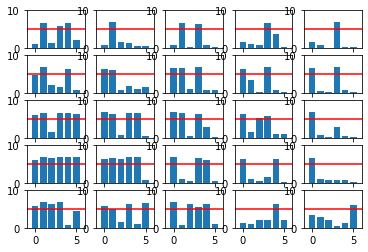

In [98]:
# Mostra todos os pesos 
cont = 1;
x = np.arange(qtCaracteristicas)
for row in pesos:
  for elem in row:
    plt.subplot(tamanhoXdaRede,tamanhoYdaRede,cont)
    cont=cont+1
    plt.axis([-1, 6, 0, 10])
    plt.bar(x, elem)
    plt.plot([-1,6],[5,5],'r')
plt.show()

In [99]:
def mostraNeuronio(linha,coluna): 
  # Mostra um peso 
  x = ['Prob1','Prob2', 'Prob3', 'Prob4','Prob5','Prob6']
  plt.plot([-1,6],[5,5],'r')
  plt.axis([-1, 6, 0, 10])
  plt.bar(x, pesos[linha,coluna,:])
  plt.show()

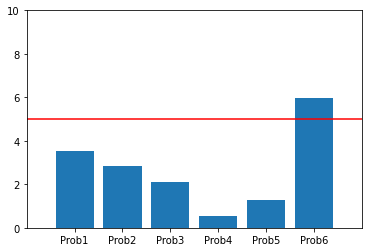

In [100]:
mostraNeuronio(4,4)

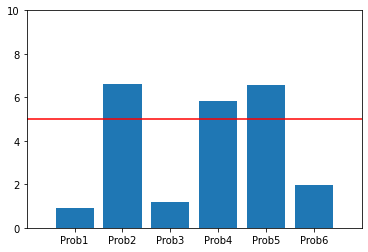

In [101]:
mostraNeuronio(0,0)